<a href="https://colab.research.google.com/github/usmanraza121/3D-Detection-Tracking-Viewer/blob/master/Copy_of_YOLOX_SAHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Megvii-BaseDetection/YOLOX.git

Cloning into 'YOLOX'...
remote: Enumerating objects: 1473, done.
remote: Total 1473 (delta 0), reused 0 (delta 0), pack-reused 1473
Receiving objects: 100% (1473/1473), 5.96 MiB | 22.59 MiB/s, done.
Resolving deltas: 100% (856/856), done.


In [ ]:
%cd YOLOX
!pip3 install -v -e .

/content/YOLOX
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/bin
sysconfig: /usr/bin
Value for scheme.data does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local
sysconfig: /usr
Additional context:
us

In [ ]:
%cd ..

/content


In [ ]:
!git clone https://github.com/Resham-Sundar/sahi-yolox.git

Cloning into 'sahi-yolox'...
remote: Enumerating objects: 2063, done.
remote: Counting objects: 100% (2063/2063), done.
remote: Compressing objects: 100% (652/652), done.
remote: Total 2063 (delta 1295), reused 2055 (delta 1290), pack-reused 0
Receiving objects: 100% (2063/2063), 42.72 MiB | 27.83 MiB/s, done.
Resolving deltas: 100% (1295/1295), done.


In [ ]:
%cd sahi-yolox
!pip install -r requirements.txt
#restart runtime after running this cell and execute this cell once again

/content/sahi-yolox


In [ ]:
!gdown "https://github.com/Megvii-BaseDetection/YOLOX/releases/download/0.1.1rc0/yolox_m.pth"

Downloading...
From: https://github.com/Megvii-BaseDetection/YOLOX/releases/download/0.1.1rc0/yolox_m.pth
To: /content/sahi-yolox/yolox_m.pth
100% 203M/203M [00:02<00:00, 90.5MB/s]


In [ ]:
import yolox
from sahi.model import YoloXDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [ ]:
config_file_template = '''

#!/usr/bin/env python3
# -*- coding:utf-8 -*-
# Copyright (c) Megvii, Inc. and its affiliates.

import os

from yolox.exp import Exp as MyExp


class Exp(MyExp):
    def __init__(self):
        super(Exp, self).__init__()
        self.depth = 0.67
        self.width = 0.75
        self.exp_name = os.path.split(os.path.realpath(__file__))[1].split(".")[0]

'''

with open('test_config.py', 'w') as f:
    f.write(config_file_template)

chkpt_file = "/content/sahi/yolox_s.pth"
config_path = "test_config"

In [ ]:
CLASSES = (
    "person",
    "bicycle",
    "car",
    "motorcycle",
    "airplane",
    "bus",
    "train",
    "truck",
    "boat",
    "traffic light",
    "fire hydrant",
    "stop sign",
    "parking meter",
    "bench",
    "bird",
    "cat",
    "dog",
    "horse",
    "sheep",
    "cow",
    "elephant",
    "bear",
    "zebra",
    "giraffe",
    "backpack",
    "umbrella",
    "handbag",
    "tie",
    "suitcase",
    "frisbee",
    "skis",
    "snowboard",
    "sports ball",
    "kite",
    "baseball bat",
    "baseball glove",
    "skateboard",
    "surfboard",
    "tennis racket",
    "bottle",
    "wine glass",
    "cup",
    "fork",
    "knife",
    "spoon",
    "bowl",
    "banana",
    "apple",
    "sandwich",
    "orange",
    "broccoli",
    "carrot",
    "hot dog",
    "pizza",
    "donut",
    "cake",
    "chair",
    "couch",
    "potted plant",
    "bed",
    "dining table",
    "toilet",
    "tv",
    "laptop",
    "mouse",
    "remote",
    "keyboard",
    "cell phone",
    "microwave",
    "oven",
    "toaster",
    "sink",
    "refrigerator",
    "book",
    "clock",
    "vase",
    "scissors",
    "teddy bear",
    "hair drier",
    "toothbrush",
)

In [ ]:
chkpt_file = "yolox_m.pth"
config_path = "test_config"

In [ ]:
detection_model = YoloXDetectionModel(
    model_path=chkpt_file,
    config_path = config_path,
    device="cuda:0",
    confidence_threshold=0.3,
    nms_threshold=0.4,
    image_size = (640,640),#please try to keep the image size same as on what the model is trained, otherwise you may expect mismatch of tensor size
    classes=CLASSES
)

In [ ]:
result = get_prediction("demo/demo_data/bev-car6.jpg", detection_model)

/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


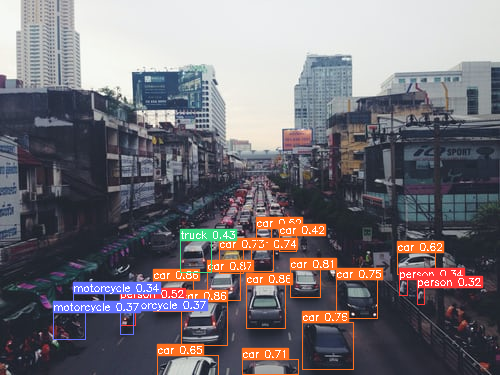

In [ ]:
result.export_visuals(export_dir="demo/demo_data/")
Image("demo/demo_data/prediction_visual.png")

In [ ]:
result = get_sliced_prediction(
    "demo/demo_data/bev-car6.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.3,
    overlap_width_ratio = 0.3,
)

Performing prediction on 6 number of slices.


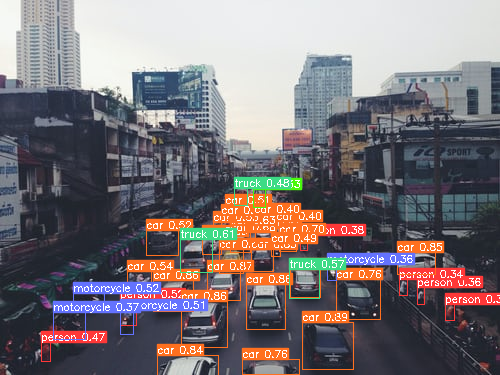

In [ ]:
result.export_visuals(export_dir="demo/demo_data/")
Image("demo/demo_data/prediction_visual.png")